In [1]:
# !/usr/bin/env python3
# 百度百科QA数据分析

In [4]:
import json
import os
import numpy as np
import jieba
import json

In [5]:
trainfile = './baike_qa2019/baike_qa_train.json'
valfile = './baike_qa2019/baike_qa_valid.json'
train_list = []
val_list = []
cats_list = []

In [6]:
with open(trainfile, 'r', encoding='utf8') as f:
    for line in f.readlines():
        if line is None or len(line) == 0:
            continue
        j_info = json.loads(line)
        train_list.append(j_info)

In [7]:
with open(valfile, 'r', encoding='utf8') as f:
    for line in f.readlines():
        if line is None or len(line) == 0:
            continue
        j_info = json.loads(line)
        val_list.append(j_info)

In [8]:
# 训练QA数据
print('====> 训练QA数据:\t', len(train_list))
print(train_list[0])
print('\n')
print('====> 验证集数据:\t', len(val_list))
print(val_list[0])

====> 训练QA数据:	 1425170
{'qid': 'qid_5982723620932473219', 'category': '教育/科学-理工学科-地球科学', 'title': '人站在地球上为什么没有头朝下的感觉 ', 'desc': '', 'answer': '地球上重力作用一直是指向球心的，因此\r\n只要头远离球心，人们就回感到头朝上。'}


====> 验证集数据:	 44972
{'qid': 'qid_1815059893214501395', 'category': '烦恼-恋爱', 'title': '请问深入骨髓地喜欢一个人怎么办我不能确定对方是不是喜欢我，我却想 ', 'desc': '我不能确定对方是不是喜欢我，我却想分分秒秒跟他在一起，有谁能告诉我如何能想他少一点', 'answer': '一定要告诉他你很喜欢他 很爱他!!  虽然不知道你和他现在的关系是什么！但如果真的觉得很喜欢就向他表白啊！！起码你努力过了！  女生主动多少占一点优势的！！呵呵  只愿曾经拥有！  到以后就算感情没现在这么强烈了也不会觉得遗憾啊~！  与其每天那么痛苦的想他 恋他 还不如直接告诉他 ！  不要怕回破坏你们现有的感情！因为如果不告诉他  你可能回后悔一辈子！！  '}


In [11]:
# 种类分布
import collections
from collections import Counter
import wordcloud

In [10]:
train_cats_list = []
val_cats_list = []

In [12]:
for elem in train_list:
    if 'category' in elem:
        train_cats_list.append(elem['category'])
for elem in val_list:
    if 'category' in elem:
        val_cats_list.append(elem['category'])

In [17]:
train_cats = Counter(train_cats_list)
val_cats = Counter(val_cats_list)

In [15]:
train_cats = sorted(train_cats.items(), key=lambda x: x[1], reverse=True)
val_cats = sorted(val_cats.items(), key=lambda x: x[1], reverse=True)

In [24]:
train_cats

Counter({'教育/科学-理工学科-地球科学': 1976,
         '娱乐-宠物': 5840,
         '娱乐-度假旅游': 15607,
         '电脑/网络-互联网': 22813,
         '生活-美食/烹饪': 12742,
         '健康-整形美容-颌面整形': 403,
         '健康-医院': 9907,
         '娱乐-谜语': 6935,
         '娱乐-博彩': 46124,
         '健康': 11584,
         '游戏-网易游戏-魔兽世界': 29708,
         '商业/理财-股票': 38772,
         '教育/科学-外语学习-英语考试': 7584,
         '教育/科学-升学入学-高考': 6444,
         '教育/科学-学习帮助': 31242,
         '生活-购物': 16088,
         '社会民生-求职就业': 8737,
         '电脑/网络-软件-办公软件': 3017,
         '娱乐-幽默滑稽': 15636,
         '健康-人体常识': 14733,
         '电子数码-手机/通讯-手机使用': 4066,
         '健康-肿瘤科-宫颈癌': 1569,
         '教育/科学-理工学科-生物学': 14236,
         '电脑/网络-软件': 16954,
         '娱乐-星座/运势': 12471,
         '生活-起名': 2155,
         '娱乐-花鸟鱼虫': 4890,
         '育儿-宝宝-婴儿期': 8354,
         '教育/科学-理工学科-数学': 13492,
         '娱乐-电影': 8359,
         '健康-皮肤科': 5113,
         '教育/科学': 8254,
         '游戏-完美游戏-诛仙': 12227,
         '汽车-选车-车型': 2664,
         '游戏-网络游戏-热血江湖': 3341,
         '电脑/

In [19]:
# 检查训练集合和验证集合的数据种类关系
print('训练集合数据种类:\t', len(train_cats))
print('验证集合数据种类:\t', len(val_cats))

训练集合数据种类:	 388
验证集合数据种类:	 321


In [34]:
# 检查验证集合中是否含有训练集合中没有的种类
val_all_cats = list(val_cats)
train_all_cats = list(train_cats)
for elem in val_all_cats:
    if elem not in train_all_cats:
        print(elem)
        
#训练集内的种类包含了验证集内所有的种类

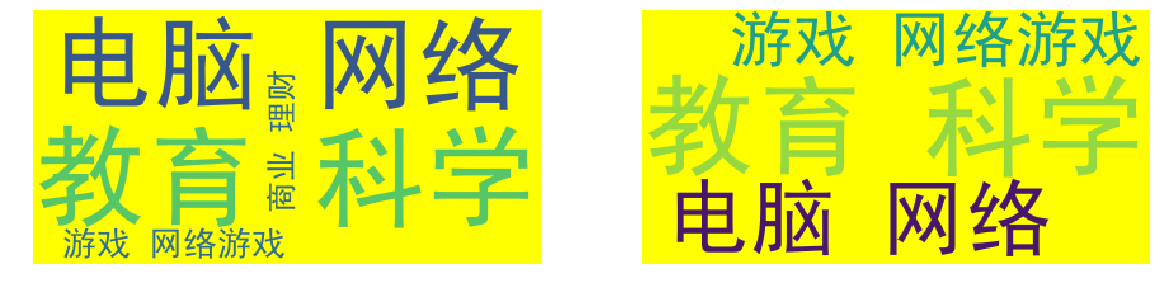

In [38]:
# 绘制种类的云图
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
train_cats_txt = ' '.join(train_cats_list)
val_cats_txt = ' '.join(val_cats_list)
wordcloud1 = WordCloud(background_color='yellow', max_font_size=200, min_font_size=20, mode='RGBA', font_path='/Users/higgs/Library/Fonts/SimHei.ttf')
wordcloud2 = WordCloud(background_color='yellow', max_font_size=200, min_font_size=20, mode='RGBA', font_path='/Users/higgs/Library/Fonts/SimHei.ttf')
train_cats_pic = wordcloud1.generate(train_cats_txt)
val_cats_pic = wordcloud2.generate(val_cats_txt)
f, axs = plt.subplots(1,2,figsize=(20,15))
plt.subplot(121)
plt.imshow(train_cats_pic)
plt.axis('off')
plt.subplot(122)
plt.imshow(val_cats_pic)
plt.axis('off')
plt.show()